# Principal component analysis continued

Let's pull up our nutrition data again. 

In [13]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import sklearn.preprocessing as preprocessing
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
% matplotlib inline

In [14]:
data = pd.read_csv('nndb.csv', index_col=0)
data.drop(data.columns[data.columns.str.contains('USRDA')].values, inplace = True, axis=1)

In [15]:
data_desc = data.iloc[:, :3]
data.drop(data.columns[:6].values, axis=1, inplace = True)

In [16]:
from sklearn.preprocessing import StandardScaler
data_stand = StandardScaler().fit_transform(data)
data_stand = pd.DataFrame(data_stand)

In [22]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
pca.fit(data_stand)

PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [23]:
pca.components_

array([[ 0.15781367,  0.14062014,  0.03300801,  0.16968462,  0.07632269,
         0.18157009,  0.13351909,  0.31566255,  0.17798438,  0.08763951,
         0.13712215,  0.28410245,  0.33777884,  0.34132454,  0.27245332,
         0.16811192,  0.18080587,  0.29985691,  0.24134813,  0.09356744,
         0.19940267,  0.09231858,  0.24355142],
       [-0.27344847,  0.34339988, -0.1116716 , -0.44341529, -0.35877094,
        -0.25771524,  0.23648469,  0.02112324,  0.35502901, -0.03852764,
        -0.10637094, -0.09710624,  0.08480726,  0.07347675, -0.07514126,
        -0.10515819,  0.21266939, -0.09382853, -0.10337391,  0.08878011,
         0.08743509,  0.23932549,  0.17781505],
       [-0.46199852, -0.21354117, -0.53406614,  0.04984253,  0.0552317 ,
        -0.0403809 , -0.02188985,  0.1746181 , -0.01277952,  0.16231964,
        -0.20731545,  0.2309992 ,  0.16486557,  0.19208485,  0.18436932,
        -0.12814644, -0.15227729,  0.08710913, -0.20125768, -0.07264026,
        -0.27480224, -0.1633

In [25]:
print(pca.explained_variance_)

[5.44991815 2.61876219 2.0321333  1.87934926 1.6358604 ]


In [123]:
# from sklearn.decomposition import PCA
fit = PCA()
pca = fit.fit_transform(data_stand)

In [26]:
26*26*26

17576

#### check the eigenvalues to find most important components

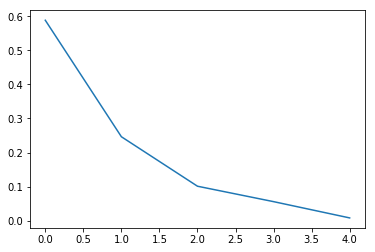

In [10]:
plt.plot(fit.explained_variance_ratio_);

In [126]:
print(fit.explained_variance_ratio_)
print(fit.explained_variance_ratio_[:5].sum())

[2.36925468e-01 1.13846015e-01 8.83433734e-02 8.17013669e-02
 7.11161480e-02 4.95813332e-02 4.61246638e-02 4.02719041e-02
 3.74790508e-02 3.58559322e-02 3.17927198e-02 2.59519549e-02
 2.21153503e-02 2.04113766e-02 1.77385355e-02 1.46927827e-02
 1.43290735e-02 1.39668837e-02 1.11392349e-02 1.03538827e-02
 9.18082227e-03 6.91711649e-03 1.65010749e-04]
0.5919323716235945


In [127]:
## ??? 
pca = pd.DataFrame(pca[:, :5], index=data.index)
pca = pca.join(data_desc)
pca.rename(columns={0:'c1',1:'c2',2:'c3',3:'c4',4:'c5'}, inplace=True)

In [128]:
# we see that the five vectors are orthogonal
np.round(pca.corr(), 5)

,c1,c2,c3,c4,c5
c1,1.0,-0.0,-0.0,-0.0,0.0
c2,-0.0,1.0,0.0,-0.0,0.0
c3,-0.0,0.0,1.0,0.0,-0.0
c4,-0.0,-0.0,0.0,1.0,0.0
c5,0.0,0.0,-0.0,0.0,1.0


## Try to interpret the components

(this is where deep subject matter expertise, in this case nutrition, comes in handy)

#### NOTE: The descriptions are not correct as we didn't do boxfox transformations

**Component one** 

foods that are high in: zinc, and other vitamins and minerals

low in: sugar, vitamin C, Carbs, and fiber

In [138]:
vects = fit.components_[:5]

one = pd.Series(vects[0], index=data.columns)
one.sort_values(ascending=False)

Riboflavin_mg    0.341325
Niacin_mg        0.337779
VitB6_mg         0.315663
Iron_mg          0.299857
Folate_mcg       0.284102
Thiamin_mg       0.272453
Zinc_mg          0.243551
Magnesium_mg     0.241348
Phosphorus_mg    0.199403
Fiber_g          0.181570
Copper_mcg       0.180806
VitB12_mcg       0.177985
Carb_g           0.169685
Calcium_mg       0.168112
Energy_kcal      0.157814
Protein_g        0.140620
VitE_mg          0.137122
VitA_mcg         0.133519
Manganese_mg     0.093567
Selenium_mcg     0.092319
VitC_mg          0.087639
Sugar_g          0.076323
Fat_g            0.033008
dtype: float64

**Component two**

High: Carbs, Fiber, Mang, Sugar, Vitamin C...

Low: Vitamine B12, protein, selenium, Fat...

In [130]:
two = pd.Series(vects[1], index=data.columns)
two.sort_values(ascending=False)

VitB12_mcg       0.355045
Protein_g        0.343397
Selenium_mcg     0.239322
VitA_mcg         0.236470
Copper_mcg       0.212669
Zinc_mg          0.177798
Manganese_mg     0.088783
Phosphorus_mg    0.087448
Niacin_mg        0.084801
Riboflavin_mg    0.073471
VitB6_mg         0.021129
VitC_mg         -0.038525
Thiamin_mg      -0.075150
Iron_mg         -0.093812
Folate_mcg      -0.097093
Magnesium_mg    -0.103361
Calcium_mg      -0.105173
VitE_mg         -0.106372
Fat_g           -0.111670
Fiber_g         -0.257733
Energy_kcal     -0.273449
Sugar_g         -0.358769
Carb_g          -0.443416
dtype: float64

**Component three**

High: calories, fat, carbs, sugar...

Low: vitamin A, vitamin C, folate, copper...

In [131]:
three = pd.Series(vects[2], index=data.columns)
three.sort_values(ascending=False)

Folate_mcg       0.230985
Riboflavin_mg    0.192098
Thiamin_mg       0.184351
VitB6_mg         0.174648
Niacin_mg        0.164885
VitC_mg          0.162303
Iron_mg          0.087109
Sugar_g          0.055247
Carb_g           0.049822
VitB12_mcg      -0.012760
VitA_mcg        -0.021929
Zinc_mg         -0.038639
Fiber_g         -0.040397
Manganese_mg    -0.072630
Calcium_mg      -0.128139
Copper_mcg      -0.152263
Selenium_mcg    -0.163361
Magnesium_mg    -0.201225
VitE_mg         -0.207331
Protein_g       -0.213567
Phosphorus_mg   -0.274814
Energy_kcal     -0.462006
Fat_g           -0.534051
dtype: float64

**Component four**

High: vitamin A, vitamin E, fat, sugar, calcium, vitamin B12, calories...

Low: manganese, copper, iron, magnesium, fiber

In [132]:
four = pd.Series(vects[3], index=data.columns)
four.sort_values(ascending=False)

VitA_mcg         0.530395
Copper_mcg       0.389929
VitB12_mcg       0.346550
Manganese_mg     0.311369
Sugar_g          0.217373
Carb_g           0.174108
Energy_kcal      0.052280
VitC_mg          0.047584
Riboflavin_mg    0.046996
Fiber_g          0.042130
Fat_g            0.026520
VitE_mg          0.026174
Folate_mcg      -0.032481
Iron_mg         -0.059443
Magnesium_mg    -0.071805
Calcium_mg      -0.099340
Thiamin_mg      -0.103518
VitB6_mg        -0.114372
Niacin_mg       -0.156394
Selenium_mcg    -0.161623
Zinc_mg         -0.166322
Phosphorus_mg   -0.207871
Protein_g       -0.311112
dtype: float64

# Now let's look at which food groups are highest in each component

In [133]:
pca.sort_values(by='c1')['FoodGroup'][:500].value_counts()

Soups, Sauces, and Gravies             219
Beverages                              176
Vegetables and Vegetable Products       28
Fruits and Fruit Juices                 27
American Indian/Alaska Native Foods     11
Sweets                                   9
Baby Foods                               6
Legumes and Legume Products              6
Spices and Herbs                         6
Fats and Oils                            5
Dairy and Egg Products                   3
Meals, Entrees, and Side Dishes          2
Baked Products                           1
Fast Foods                               1
Name: FoodGroup, dtype: int64

In [134]:
pca.sort_values(by='c2')['FoodGroup'][:500].value_counts()

Sweets                                 170
Baked Products                         148
Breakfast Cereals                       53
Spices and Herbs                        26
Snacks                                  22
Beverages                               18
Fruits and Fruit Juices                 16
Fats and Oils                           14
Vegetables and Vegetable Products       12
Baby Foods                               7
Dairy and Egg Products                   5
Nut and Seed Products                    4
American Indian/Alaska Native Foods      3
Cereal Grains and Pasta                  1
Legumes and Legume Products              1
Name: FoodGroup, dtype: int64

In [135]:
pca.sort_values(by='c3')['FoodGroup'][:500].value_counts()

Fats and Oils                          148
Nut and Seed Products                   90
Dairy and Egg Products                  57
Legumes and Legume Products             50
Beef Products                           20
Lamb, Veal, and Game Products           20
Sweets                                  19
American Indian/Alaska Native Foods     17
Pork Products                           16
Snacks                                  15
Spices and Herbs                        14
Beverages                                8
Breakfast Cereals                        6
Finfish and Shellfish Products           5
Poultry Products                         4
Baked Products                           3
Baby Foods                               2
Cereal Grains and Pasta                  2
Soups, Sauces, and Gravies               1
Vegetables and Vegetable Products        1
Sausages and Luncheon Meats              1
Fast Foods                               1
Name: FoodGroup, dtype: int64

In [136]:
pca.sort_values(by='c4')['FoodGroup'][:500].value_counts()

Beef Products                          149
Pork Products                          107
Poultry Products                        39
Breakfast Cereals                       34
Dairy and Egg Products                  34
Lamb, Veal, and Game Products           25
American Indian/Alaska Native Foods     19
Legumes and Legume Products             18
Nut and Seed Products                   16
Finfish and Shellfish Products          12
Baby Foods                              10
Snacks                                   8
Spices and Herbs                         7
Baked Products                           5
Cereal Grains and Pasta                  4
Beverages                                3
Sweets                                   3
Restaurant Foods                         2
Vegetables and Vegetable Products        2
Fast Foods                               2
Sausages and Luncheon Meats              1
Name: FoodGroup, dtype: int64

In [137]:
pca.sort_values(by='c5')['FoodGroup'][:500].value_counts()

Fats and Oils                          170
Breakfast Cereals                      129
Pork Products                           29
Baked Products                          22
Poultry Products                        21
Beef Products                           21
Lamb, Veal, and Game Products           21
Legumes and Legume Products             19
Sausages and Luncheon Meats             18
Snacks                                  16
American Indian/Alaska Native Foods     14
Dairy and Egg Products                   5
Nut and Seed Products                    4
Sweets                                   3
Baby Foods                               2
Beverages                                2
Fast Foods                               2
Vegetables and Vegetable Products        1
Soups, Sauces, and Gravies               1
Name: FoodGroup, dtype: int64

# small data set tryout

In [4]:
data = pd.read_csv('foodusa.csv', index_col=0)

In [5]:
data

,Bread,Burger,Milk,Oranges,Tomatoes
City,,,,,
ATLANTA,24.5,94.5,73.9,80.1,41.6
BALTIMORE,26.5,91.0,67.5,74.6,53.3
BOSTON,29.7,100.8,61.4,104.0,59.6
BUFFALO,22.8,86.6,65.3,118.4,51.2
CHICAGO,26.7,86.7,62.7,105.9,51.2
CINCINNATI,25.3,102.5,63.3,99.3,45.6
CLEVELAND,22.8,88.8,52.4,110.9,46.8
DALLAS,23.3,85.5,62.5,117.9,41.8
DETROIT,24.1,93.7,51.5,109.7,52.4


In [6]:
# from sklearn.decomposition import PCA
fit = PCA()
pca = fit.fit_transform(data)

In [8]:
pca

array([[-2.24762714e+01,  1.00845707e+01,  9.46706994e+00,
        -3.89735603e+00,  2.43537404e+00],
       [-2.53258177e+01,  1.32783721e+01, -2.65071744e-01,
         6.10614933e+00, -9.17984958e-01],
       [ 5.81098064e+00,  1.13895369e+01, -6.95261486e+00,
         8.73898110e-01, -2.45824655e+00],
       [ 1.41398558e+01, -5.96502128e+00,  5.05043799e+00,
         4.93961016e+00,  8.92254233e-01],
       [ 2.42688912e+00, -2.47720723e+00,  1.11409935e+00,
         4.71699109e+00, -2.75839538e+00],
       [-2.16579780e+00,  6.66356692e+00, -1.11848541e+00,
        -8.91766033e+00,  2.84029383e+00],
       [ 5.78854031e+00, -1.02431236e+01, -6.29539794e+00,
        -5.34410326e-01,  1.23935118e+00],
       [ 1.07573651e+01, -1.26210184e+01,  6.16362817e+00,
        -1.43598563e+00,  3.64007581e-01],
       [ 7.18530971e+00, -3.99487979e+00, -1.05358708e+01,
        -8.04561500e-03,  9.94780260e-01],
       [ 3.55970593e+01,  1.47894432e+01,  1.12532912e+01,
        -8.96013891e-01

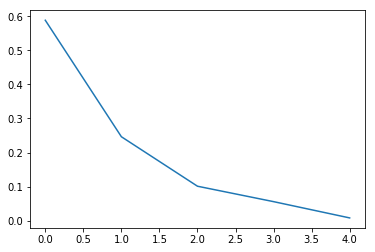

In [11]:
plt.plot(fit.explained_variance_ratio_);